<a href="https://colab.research.google.com/github/WarunaDissanayake1234/PyTorch-Tutorial/blob/main/PyTorch_Recurrent_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the necessary packages for implementing recurrent neural networks

In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as pl
import torch.nn.init as init

We will set the model hyper parameters with the size of input layer set to 7.

There will be 6 context neurons and 1 input neuron for creating target sequence.

In [4]:
dtype = torch.FloatTensor

input_size, hidden_size, output_size = 7, 6, 1

epochs = 300
seq_length = 20
lr = 0.1
data_time_steps = np.linspace(2, 10, seq_length + 1)
data = np.sin(data_time_steps)
data.resize((seq_length + 1, 1))

x = Variable(torch.Tensor(data[:-1]).type(dtype), requires_grad=False)
y = Variable(torch.Tensor(data[1:]).type(dtype), requires_grad=False)

Weights are initialized in the recurrent neural network using normal distribution with zero mean.

W1 will represent acceptance of input variables and w2

In [5]:
w1 = torch.FloatTensor(input_size,
hidden_size).type(dtype)
init.normal(w1, 0.0, 0.4)
w1 = Variable(w1, requires_grad = True)
w2 = torch.FloatTensor(hidden_size, output_size).type(dtype)
init.normal(w2, 0.0, 0.3)
w2 = Variable(w2, requires_grad = True)

<ipython-input-5-8cd10b8a9cc3>:3: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(w1, 0.0, 0.4)
<ipython-input-5-8cd10b8a9cc3>:6: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(w2, 0.0, 0.3)


Now, it is important to create a function for feed forward which uniquely defines the neural network.

In [7]:
def forward(input, context_state, w1, w2):
   xh = torch.cat((input, context_state), 1)
   context_state = torch.tanh(xh.mm(w1))
   out = context_state.mm(w2)
   return (out, context_state)

The next step is to start training procedure of recurrent neural network’s sine wave implementation. The outer loop iterates over each loop and the inner loop iterates through the element of sequence. Here, we will also compute Mean Square Error (MSE) which helps in the prediction of continuous variables.

In [10]:
for i in range(epochs):
   total_loss = 0
   context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad = True)
   for j in range(x.size(0)):
      input = x[j:(j+1)]
      target = y[j:(j+1)]
      (pred, context_state) = forward(input, context_state, w1, w2)
      loss = (pred - target).pow(2).sum()/2
      total_loss += loss
      loss.backward()
      w1.data -= lr * w1.grad.data
      w2.data -= lr * w2.grad.data
      w1.grad.data.zero_()
      w2.grad.data.zero_()
      context_state = Variable(context_state.data)
   if i % 10 == 0:
      print("Epoch: {} loss {}".format(i, total_loss.item()))

context_state = Variable(torch.zeros((1, hidden_size)).type(dtype), requires_grad = False)
predictions = []

for i in range(x.size(0)):
   input = x[i:i+1]
   (pred, context_state) = forward(input, context_state, w1, w2)
   context_state = context_state
   predictions.append(pred.data.numpy().ravel()[0])

Epoch: 0 loss 1.0994112491607666
Epoch: 10 loss 0.23343701660633087
Epoch: 20 loss 0.17125976085662842
Epoch: 30 loss 0.1465466469526291
Epoch: 40 loss 0.13244009017944336
Epoch: 50 loss 0.12189725041389465
Epoch: 60 loss 0.11299283057451248
Epoch: 70 loss 0.10519477725028992
Epoch: 80 loss 0.09830071032047272
Epoch: 90 loss 0.09218630939722061
Epoch: 100 loss 0.08675114810466766
Epoch: 110 loss 0.08190692216157913
Epoch: 120 loss 0.07757546007633209
Epoch: 130 loss 0.073687344789505
Epoch: 140 loss 0.07018224149942398
Epoch: 150 loss 0.06700653582811356
Epoch: 160 loss 0.06411445140838623
Epoch: 170 loss 0.06146655231714249
Epoch: 180 loss 0.05902852490544319
Epoch: 190 loss 0.05677155777812004
Epoch: 200 loss 0.05467040464282036
Epoch: 210 loss 0.05270388722419739
Epoch: 220 loss 0.050853755325078964
Epoch: 230 loss 0.04910406842827797
Epoch: 240 loss 0.047441672533750534
Epoch: 250 loss 0.04585486650466919
Epoch: 260 loss 0.04433373734354973
Epoch: 270 loss 0.042869582772254944
Epoc

Now, it is time to plot the sine wave as the way it is needed.

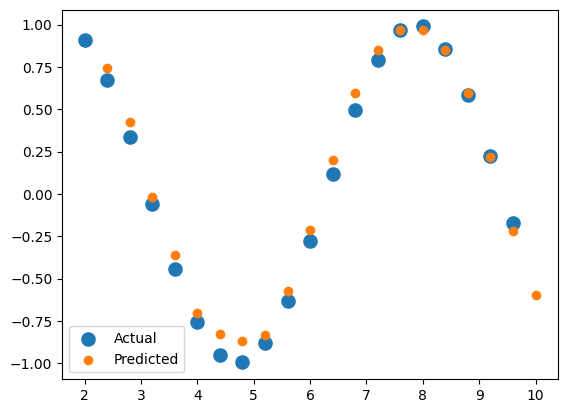

In [11]:
pl.scatter(data_time_steps[:-1], x.data.numpy(), s = 90, label = "Actual")
pl.scatter(data_time_steps[1:], predictions, label = "Predicted")
pl.legend()
pl.show()